In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib qt

In [2]:
import lane_line_helper as llh

In [3]:
from line import Line
from lane import Lane
from config import Config

# Camera Calibration and Distortion Correction Steps

In [4]:
# make list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

(objpoints, imgpoints, retlist) = llh.points_extraction(images, nx=9, ny=6)

Text(0.5,1,'Undistorted Image')

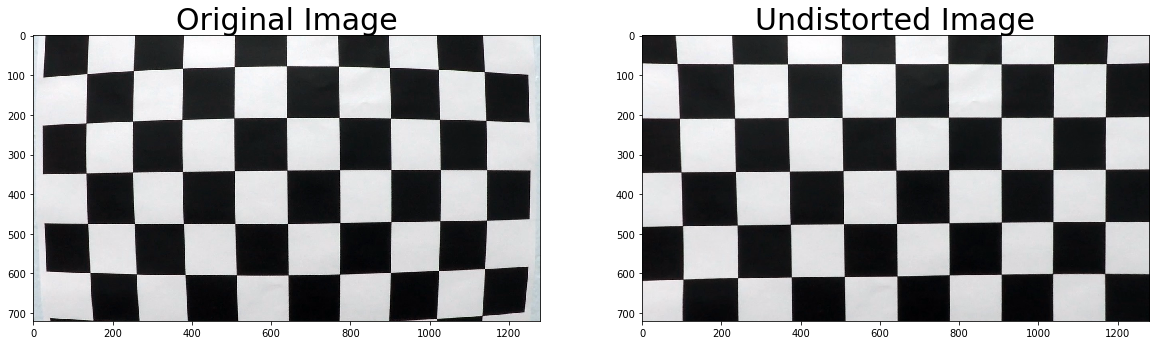

In [5]:
img = cv2.imread('camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)


dst = cv2.undistort(img, mtx, dist, None, mtx)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

In [6]:
# s_thresh=(75, 140), r_thresh = (182, 255), b_thresh = (182, 255), s_mag_thresh = (60, 110)

def color_gradient_pipline(img, s_thresh=(30, 140), r_thresh = (182, 255), 
                           b_thresh = (182, 255), s_mag_thresh = (60, 110)):
    img = np.copy(img)
    
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    
    img = np.copy(undist)
    
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)

    #h_channel = hls[:,:,0]
    #l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]

    # mag_binary = mag_thresh(image, sobel_kernel=9, mag_thresh=(30, 100))

    # dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))

#     h_thresh = (10, 70)
#     h_binary_output = np.zeros_like(h_channel)
#     h_binary_output[(h_channel > h_thresh[0]) & (h_channel <= h_thresh[1])] = 1

    #s_thresh = (75, 140)
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel > s_thresh[0]) & (s_channel <= s_thresh[1])] = 1

    # R threshold
    R = image[:,:,2]
    #r_thresh = (182, 255)
    r_binary = np.zeros_like(R)
    r_binary[(R > r_thresh[0]) & (R <= r_thresh[1])] = 1

    B = image[:,:,0]
    #b_thresh = (182, 255)
    b_binary = np.zeros_like(B)
    b_binary[(B > b_thresh[0]) & (B <= b_thresh[1])] = 1

#     # Sobel x
#     sx_thresh = (25, 110)
#     r_sx_binary = abs_sobel_thresh(R, orient='x', sobel_kernel=5, sob_thresh=sx_thresh)

    # Magnitude
    #s_mag_thresh = (60, 110)
    s_mag_binary = llh.mag_thresh(s_channel, sobel_kernel=13, mag_thresh=s_mag_thresh)

#     dir_thresh = (0.8, 1.1)
#     s_dir_binary = dir_threshold(s_channel, sobel_kernel=13, thresh=dir_thresh)




#     # Combine the two binary thresholds
#     combined_binary = np.zeros_like(h_binary_output)
#     # combined_binary[(h_binary_output == 1) | (r_sx_binary == 1) | (r_binary == 1)] = 1
#     # combined_binary[(r_sx_binary == 1) | (r_binary == 1)] = 1
#     combined_binary[(s_mag_binary == 1) | (r_binary == 1) | (b_binary == 1)] = 1


    combined_binary = np.zeros_like(s_binary)
    combined_binary[(s_mag_binary == 1) | (r_binary == 1) | (s_binary == 1) | (b_binary == 1)] = 1
    
    return combined_binary, s_mag_binary, r_binary, s_binary, b_binary

In [7]:
def show_color_gradient_pipline(img):
    combined_binary, s_mag_binary, r_binary, s_binary, b_binary = color_gradient_pipline(image)
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()

    ax1.imshow(s_mag_binary, cmap='gray')
    ax1.set_title('s_mag_binary', fontsize=40)

    ax2.imshow(r_binary, cmap='gray')
    ax2.set_title('r_binary', fontsize=40)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()

    ax1.imshow(s_binary, cmap='gray')
    ax1.set_title('s_binary', fontsize=40)

    ax2.imshow(combined_binary, cmap='gray')
    ax2.set_title('b_binary', fontsize=40)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    
    plt.imshow(combined_binary)

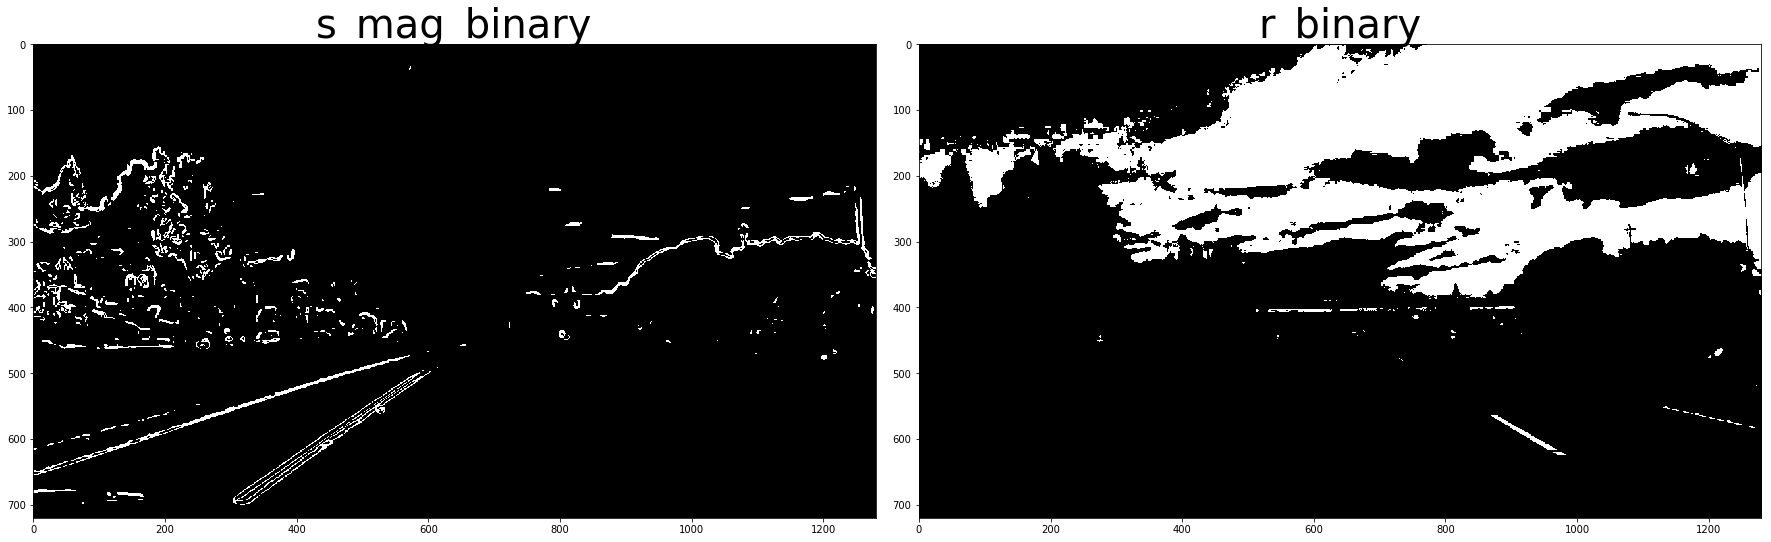

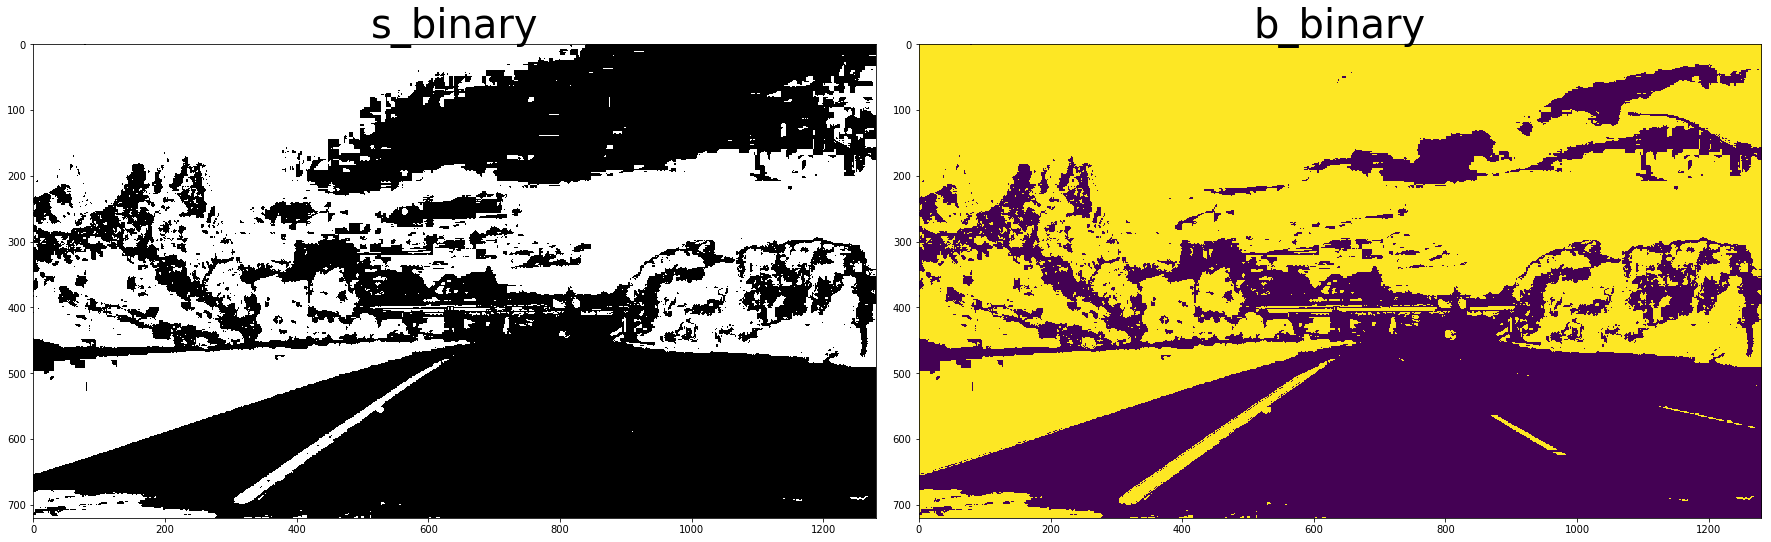

In [8]:
image = cv2.imread('test_images/challenge1.jpg')

show_color_gradient_pipline(image)

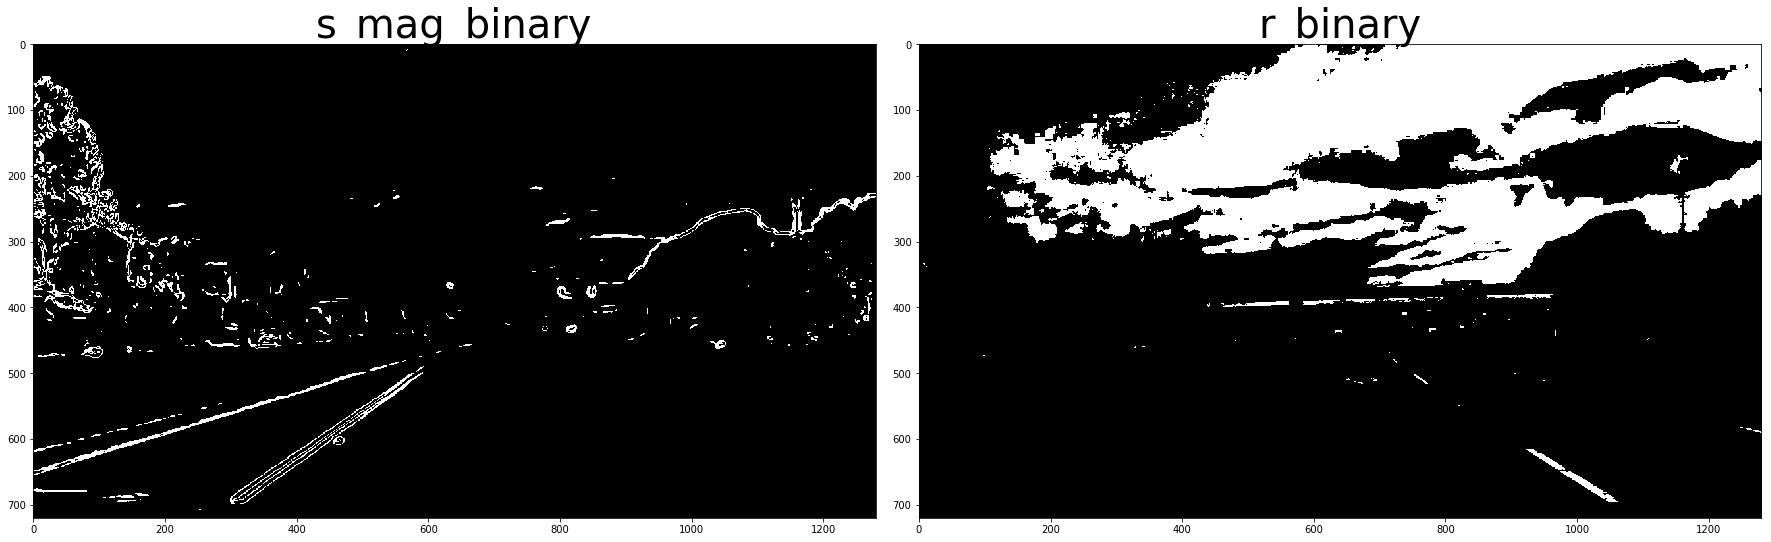

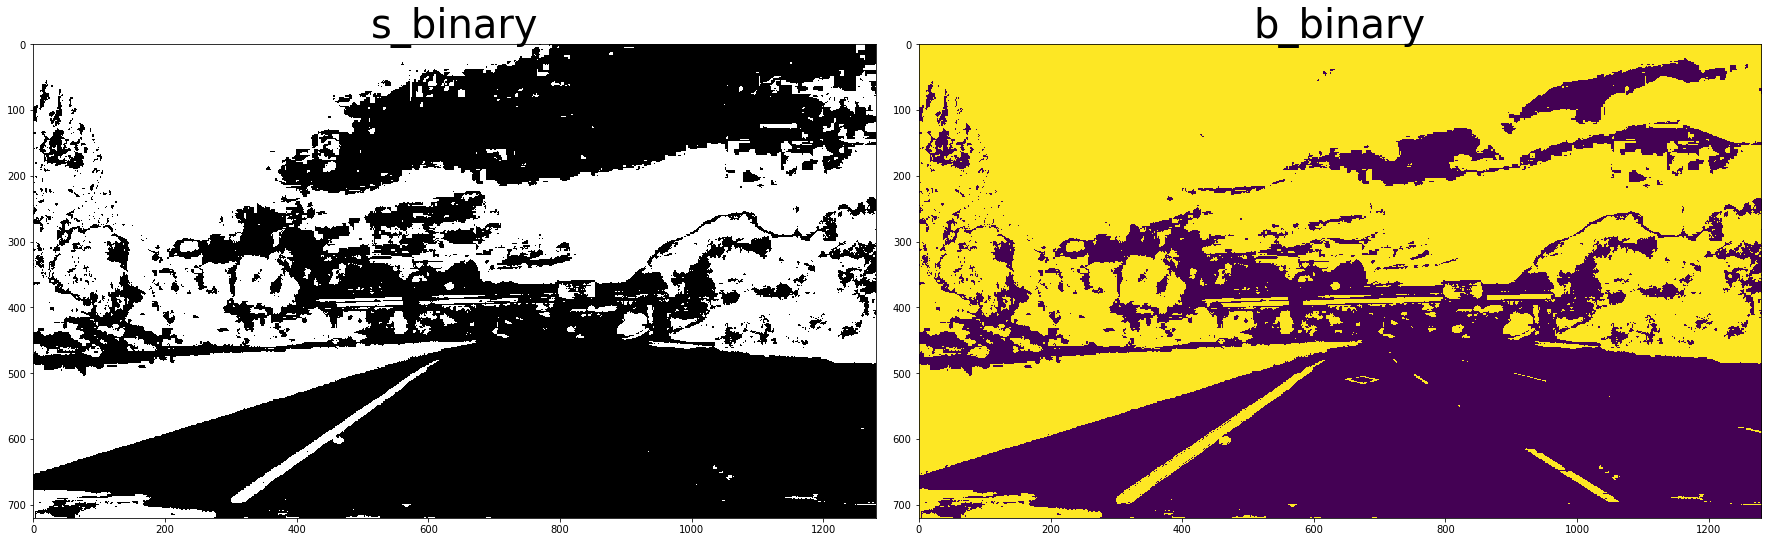

In [9]:
image = cv2.imread('test_images/challenge2.jpg')

show_color_gradient_pipline(image)

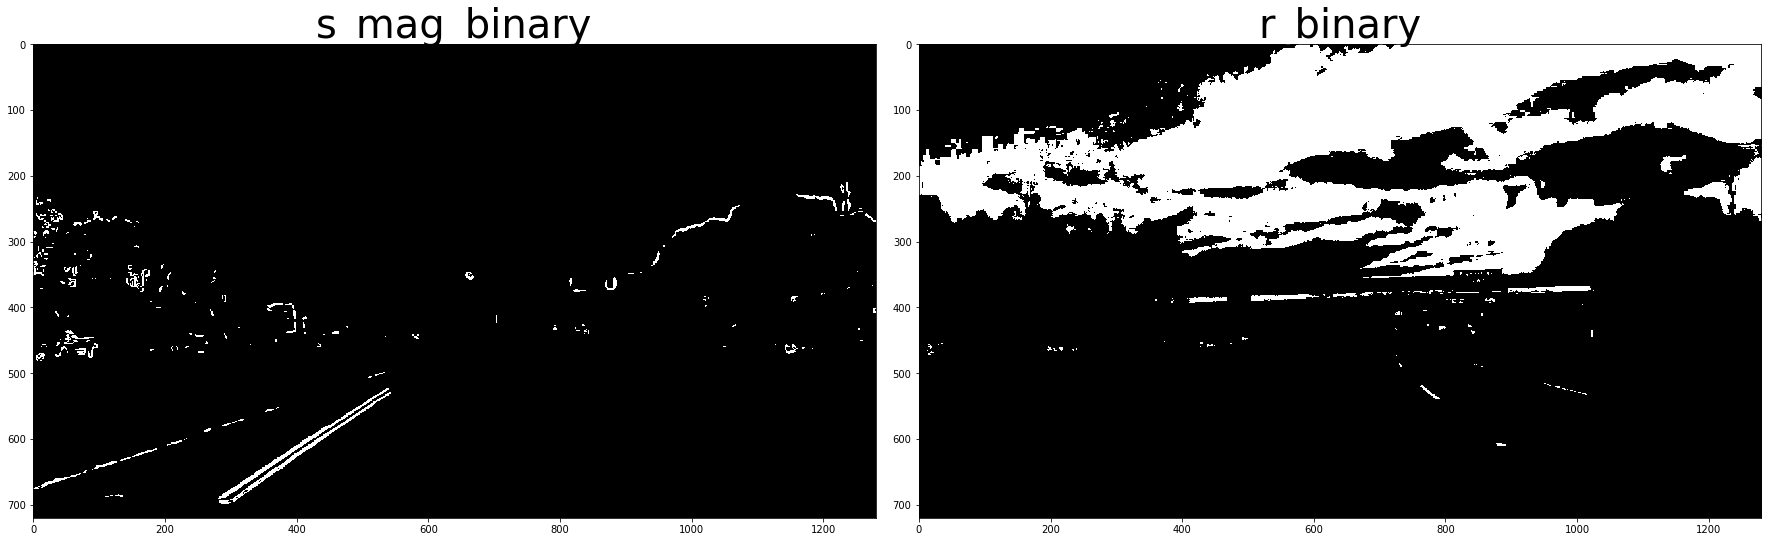

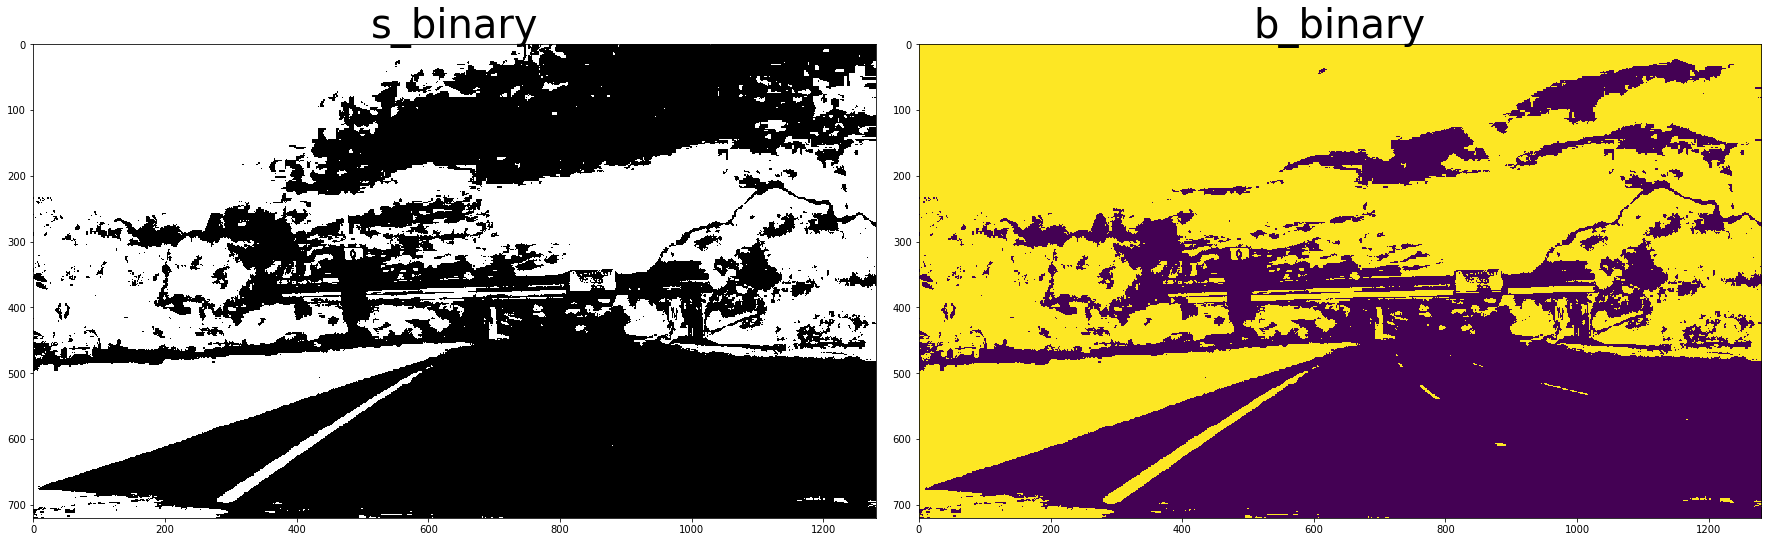

In [10]:
image = cv2.imread('test_images/challenge3.jpg')

show_color_gradient_pipline(image)

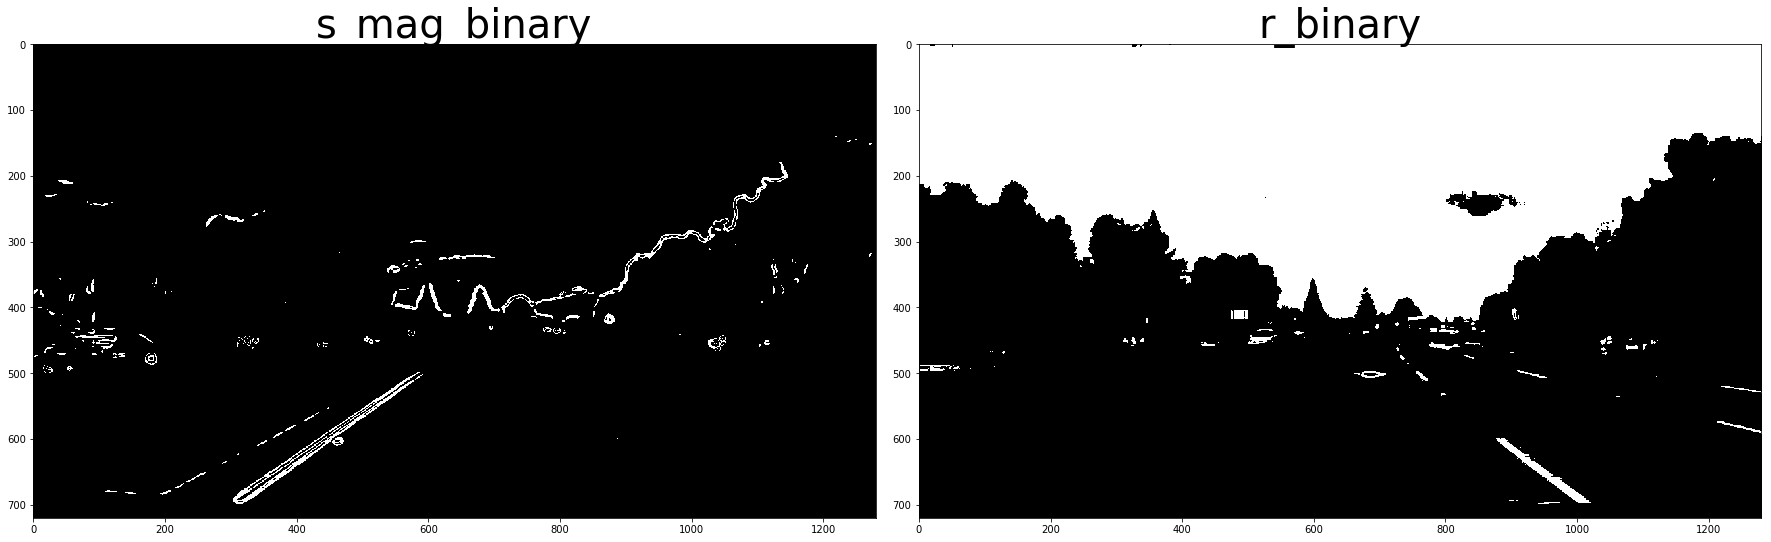

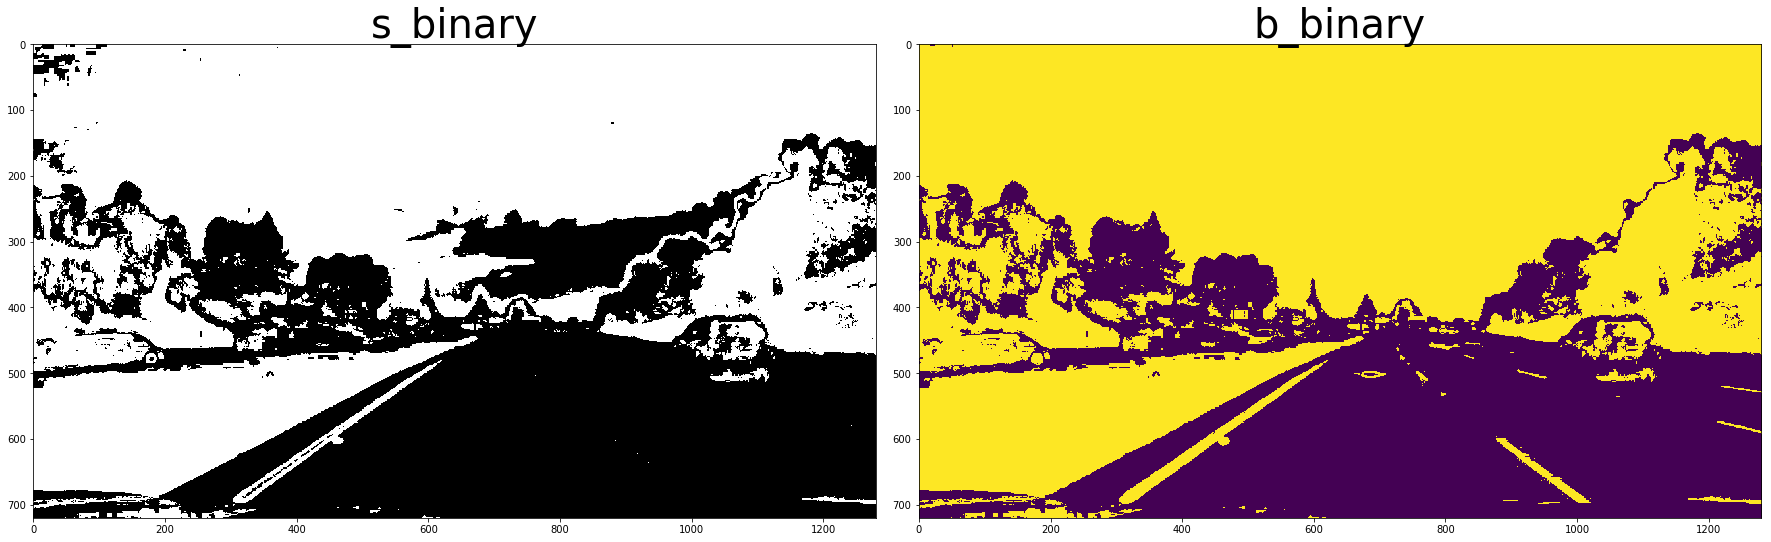

In [11]:
image = cv2.imread('test_images/challenge4.jpg')

show_color_gradient_pipline(image)

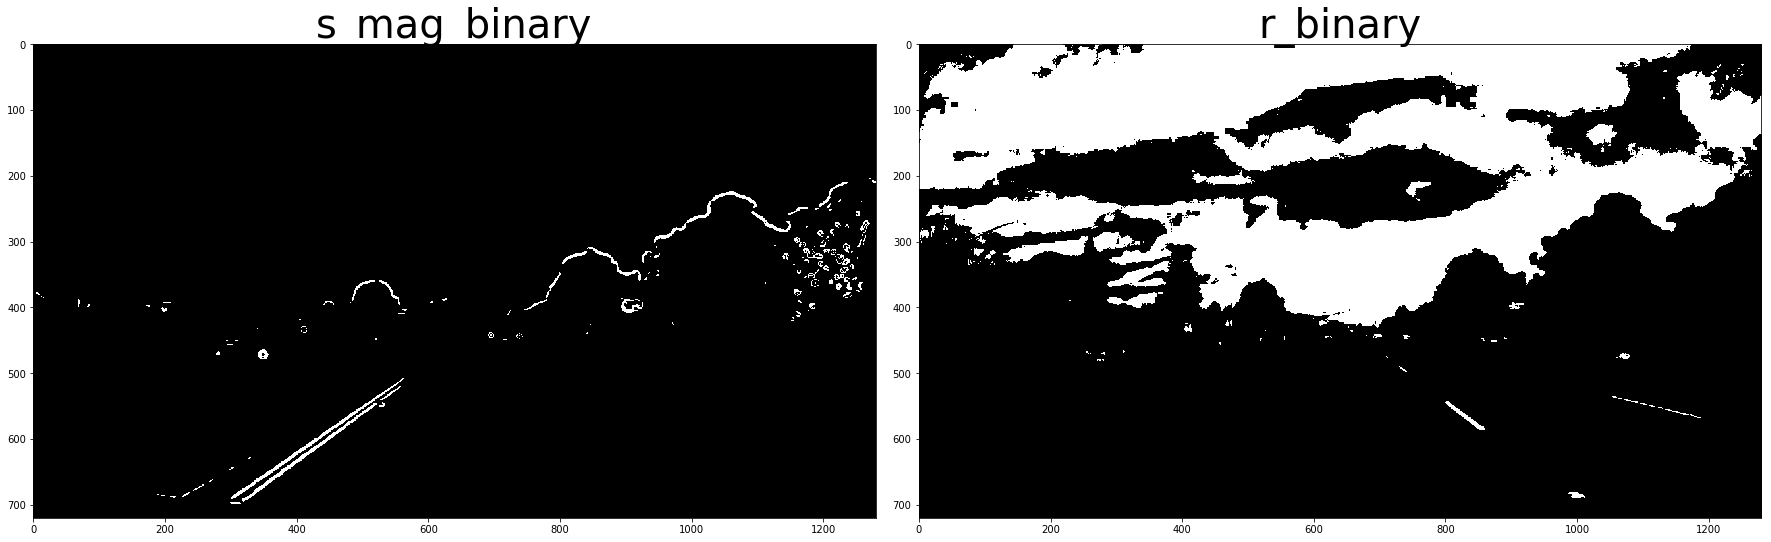

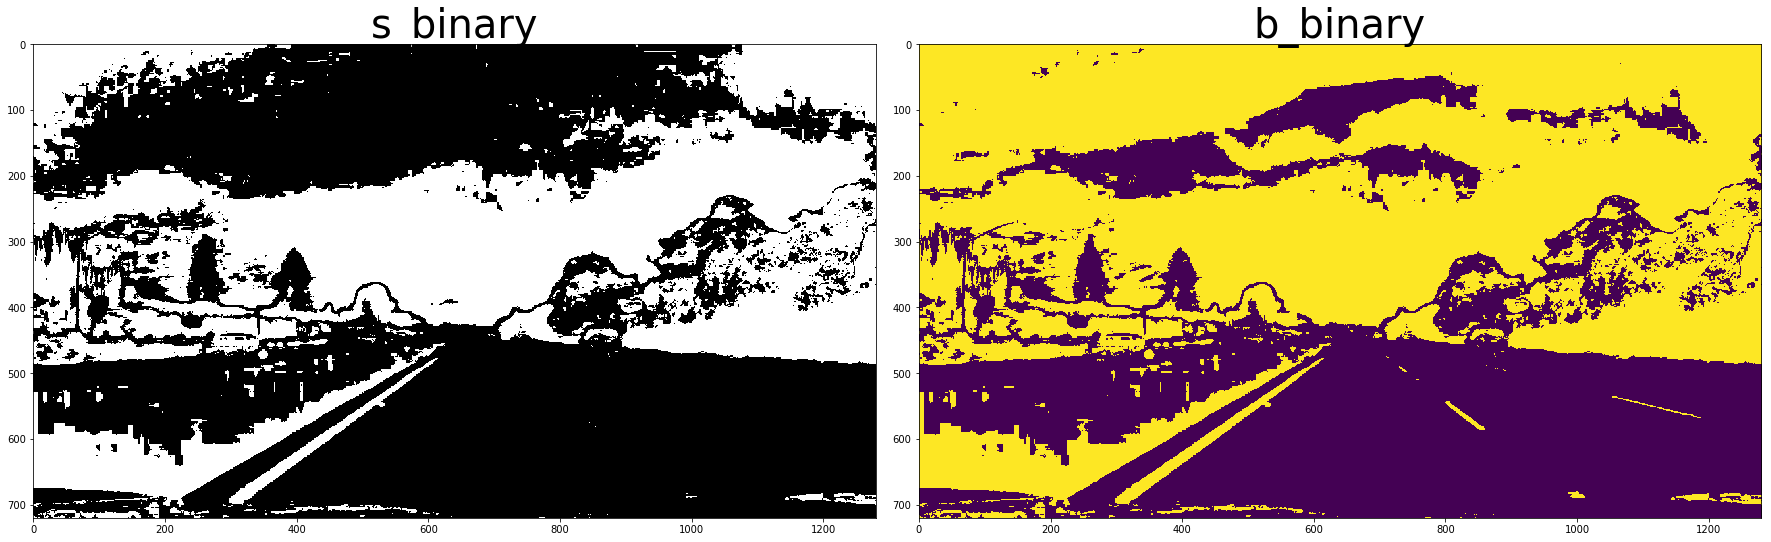

In [12]:
image = cv2.imread('test_images/challenge5.jpg')

show_color_gradient_pipline(image)

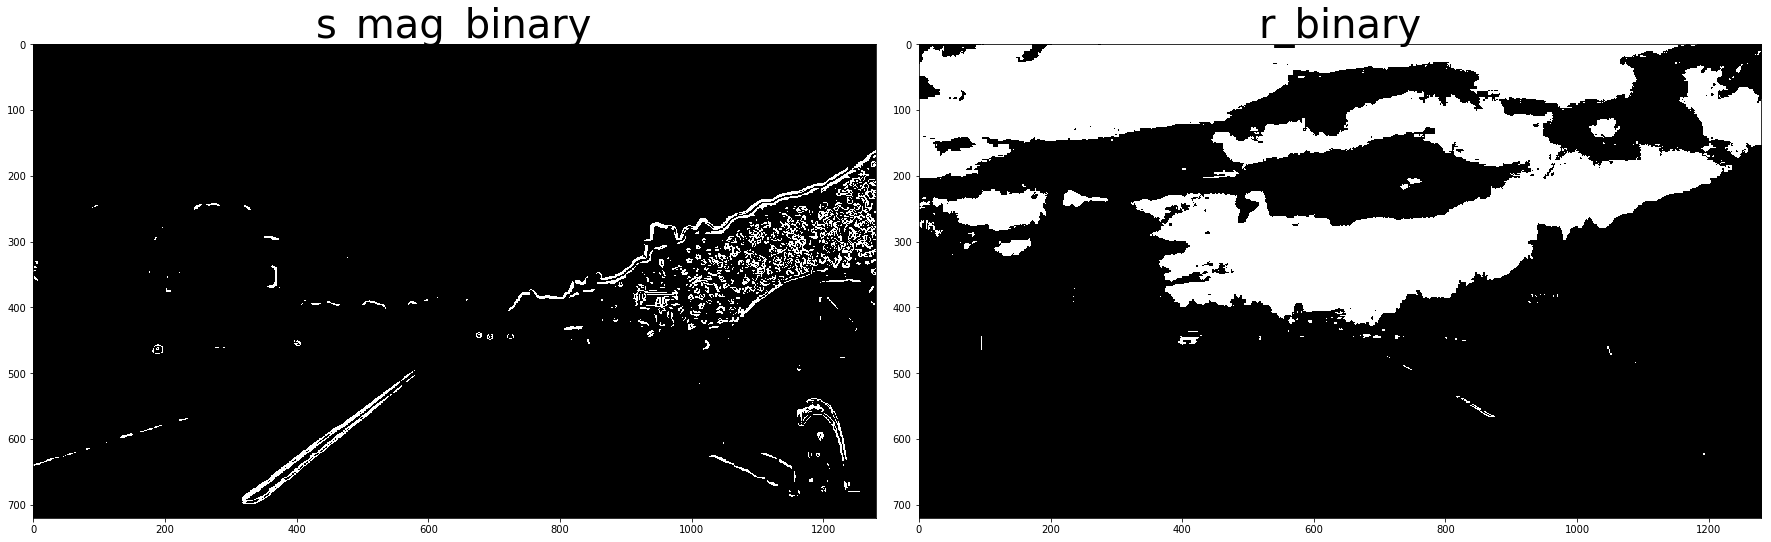

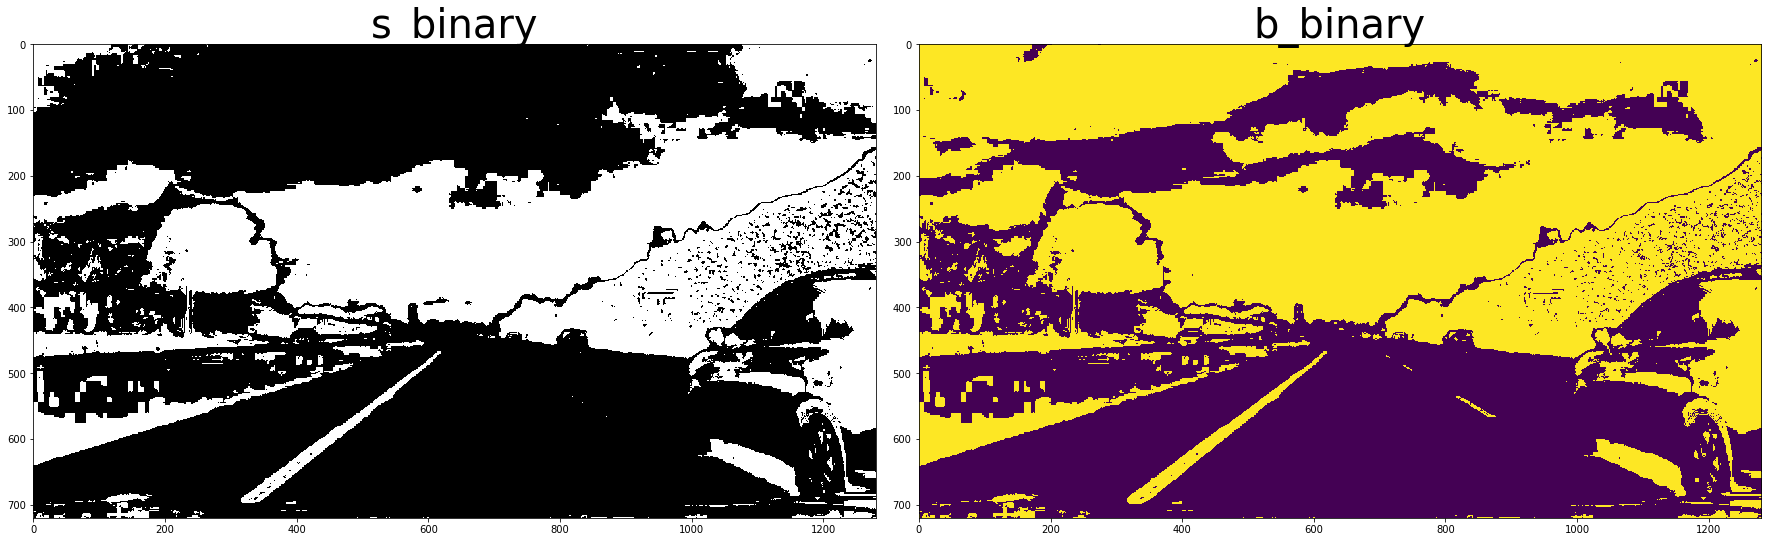

In [13]:
image = cv2.imread('test_images/challenge6.jpg')

show_color_gradient_pipline(image)

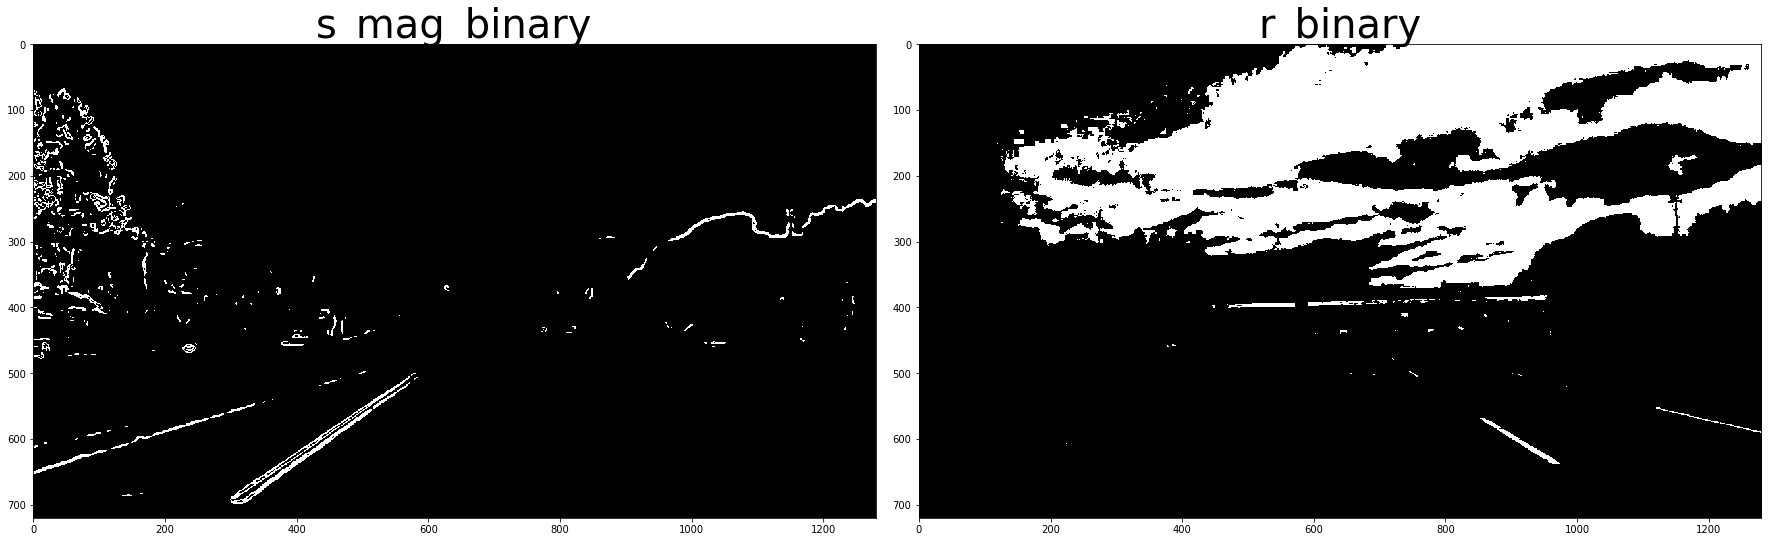

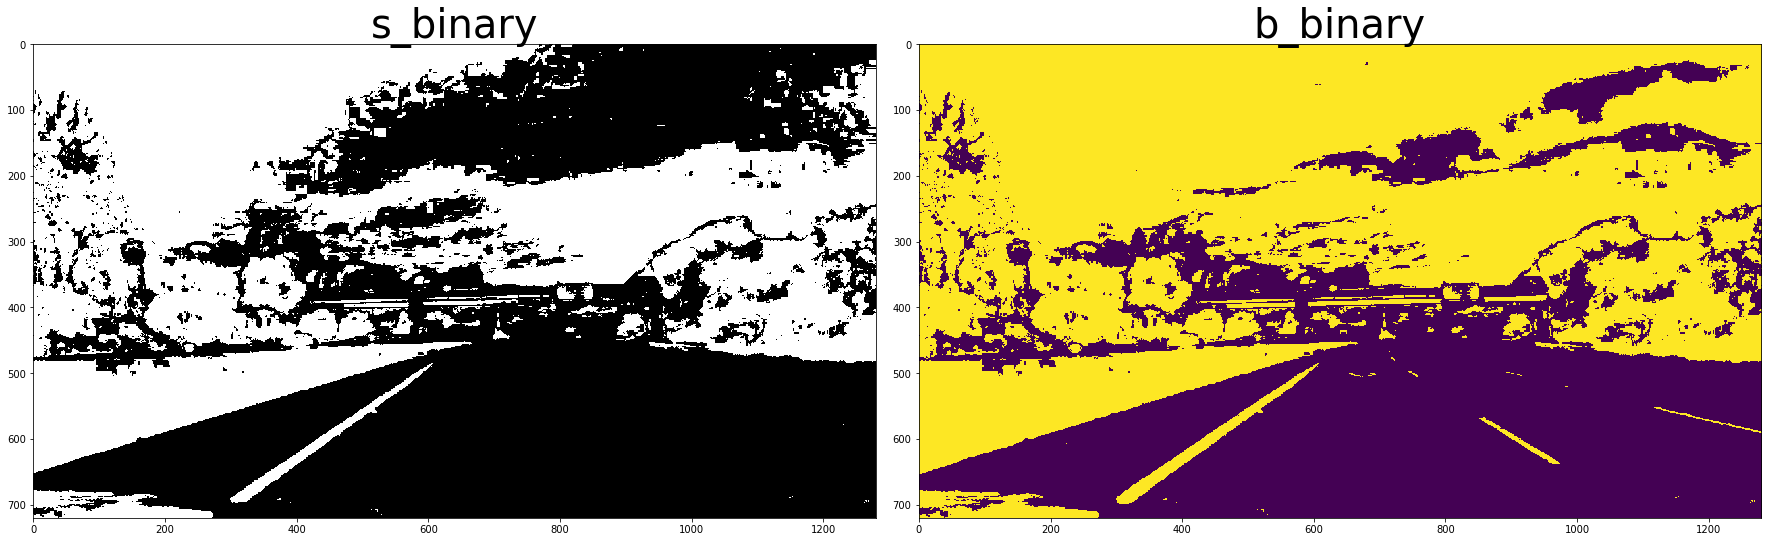

In [14]:
image = cv2.imread('test_images/challenge7.jpg')

show_color_gradient_pipline(image)

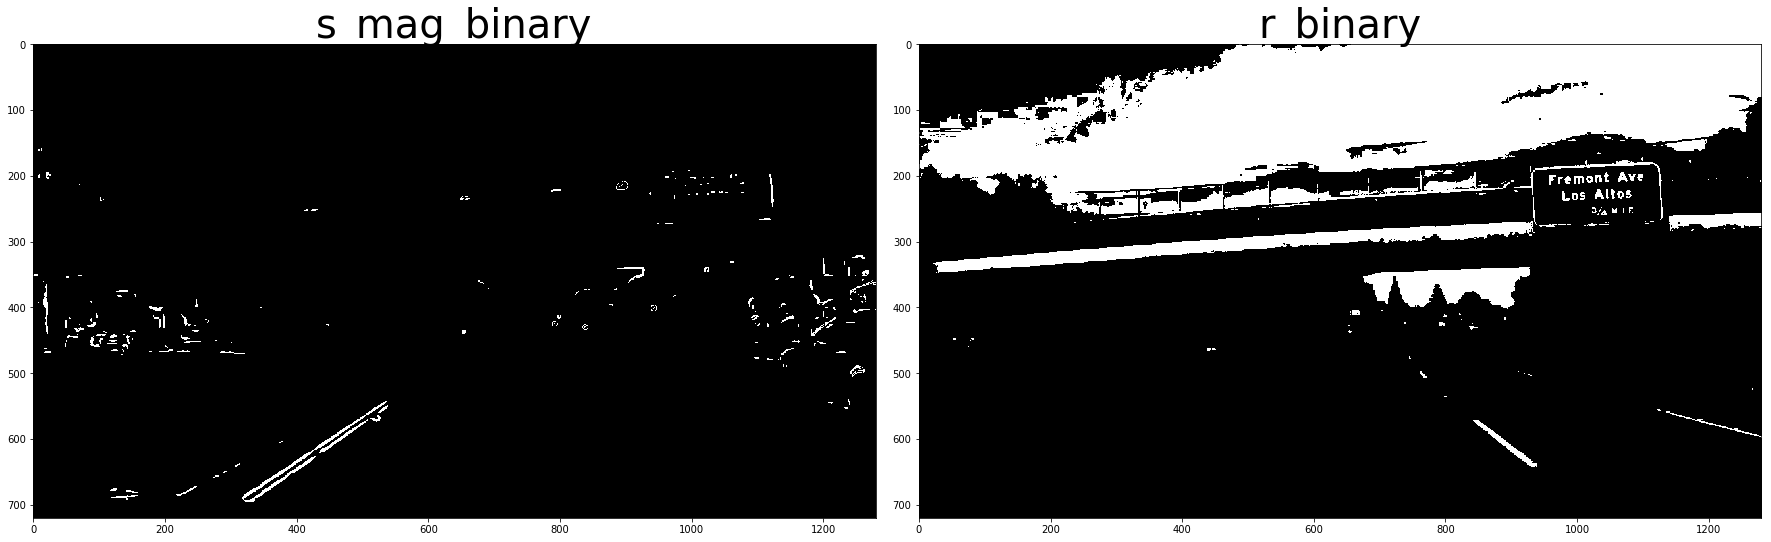

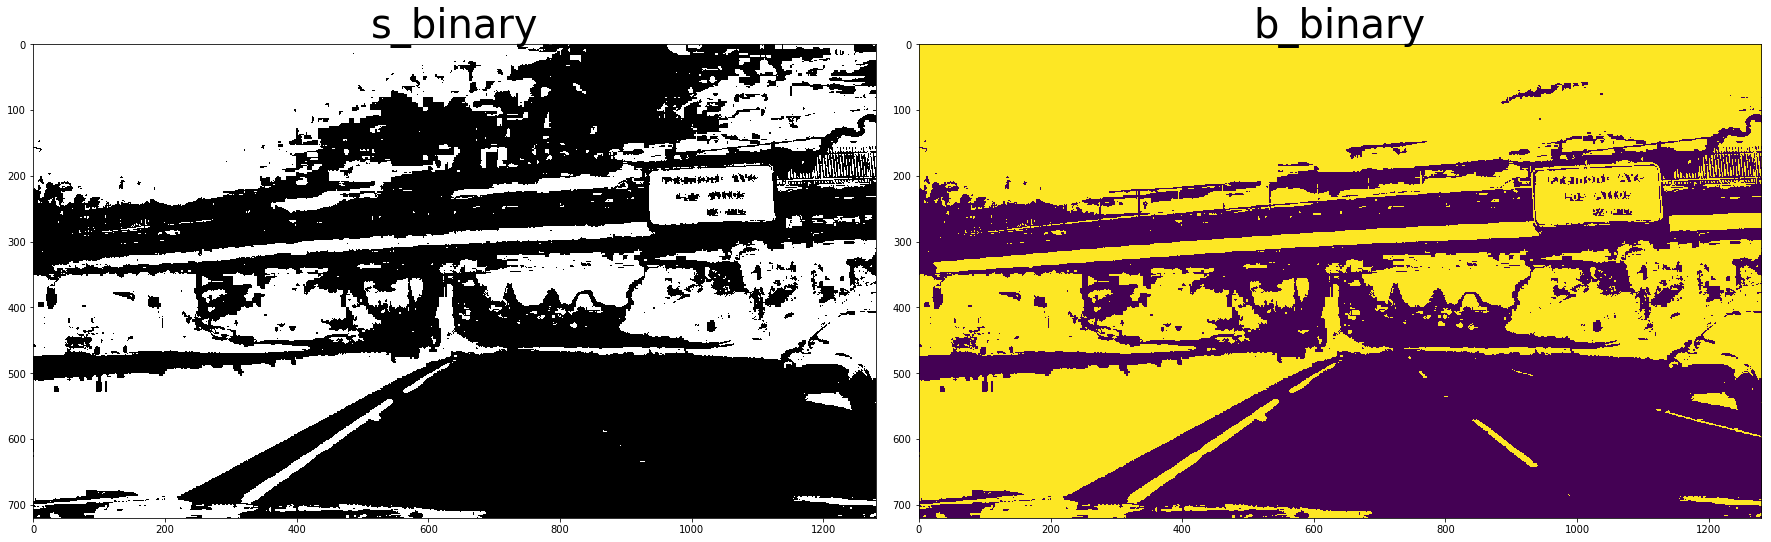

In [15]:
image = cv2.imread('test_images/challenge8.jpg')

show_color_gradient_pipline(image)

# Region of Interest

In [16]:
def show_region_of_interest(img, region):
    color = [255, 0, 0]
    line_width = 2
    cv2.line(img,(region[0][0], region[0][1]),
             (region[1][0], region[1][1]), color,line_width)
    cv2.line(img,(region[1][0], region[1][1]),
             (region[2][0], region[2][1]), color,line_width)
    cv2.line(img,(region[2][0], region[2][1]),
             (region[3][0], region[3][1]), color,line_width)
    cv2.line(img,(region[3][0], region[3][1]),
             (region[0][0], region[0][1]), color,line_width)

In [17]:
def region_of_interest(img):
    imshape = img.shape

#     vertices = np.array([[(150,imshape[0]),(imshape[1]//2-80, imshape[0]//2+80), 
#                           (imshape[1]//2+80, imshape[0]//2+80), (imshape[1]-150,imshape[0])]], dtype=np.int32)

#     vertices_left = np.array([[(150,imshape[0]),(imshape[1]//2-80, imshape[0]//2+80), 
#                           (imshape[1]//2, imshape[0]//2+80), (300,imshape[0])]], dtype=np.int32)
    
#     vertices_right = np.array([[(imshape[1]-200,imshape[0]),(imshape[1]//2, imshape[0]//2+80), 
#                       (imshape[1]//2+80, imshape[0]//2+80), (imshape[1]-75,imshape[0])]], dtype=np.int32)
    
#     vertices_left = np.array([[(150,imshape[0]),(imshape[1]//2-20, imshape[0]//2+100), 
#                           (imshape[1]//2+60, imshape[0]//2+100), (350,imshape[0])]], dtype=np.int32)
    
#     vertices_right = np.array([[(imshape[1]-300,imshape[0]),(imshape[1]//2+40, imshape[0]//2+100), 
#                           (imshape[1]//2+100, imshape[0]//2+100), (imshape[1]-75,imshape[0])]], dtype=np.int32)

    vertices_left = np.array([[(190,imshape[0]),(imshape[1]//2-25, imshape[0]//2+110), 
                              (imshape[1]//2+60, imshape[0]//2+110), (350,imshape[0])]], dtype=np.int32)

    vertices_right = np.array([[(imshape[1]-300,imshape[0]),(imshape[1]//2+40, imshape[0]//2+110), 
                          (imshape[1]//2+110, imshape[0]//2+100), (imshape[1]-75,imshape[0])]], dtype=np.int32)

    
#     vertices_left = np.array([[(155,imshape[0]-60),(imshape[1]//2.5-13, imshape[0]//2+80), 
#                       (imshape[1]//2+5, imshape[0]//2+75), (imshape[1]//2.5-105,imshape[0]-60)]], dtype=np.int32)
    
#     vertices_right = np.array([[(imshape[1]//1.5-15,imshape[0]-60),(imshape[1]//1.8-45, imshape[0]//2+80), 
#                       (imshape[1]//1.7-15, imshape[0]//2+75), (imshape[1]//1.2+45,imshape[0]-60)]], dtype=np.int32)
    
    
    
    masked_image = llh.region_of_interest(img, [vertices_left, vertices_right])
    
    return masked_image

In [18]:
def get_transformation_matrices(img):
    # Grab the image shape
    img_size = (img.shape[1], img.shape[0])

#     vertices = np.array([[(150,img_size[1]),(img_size[0]//2-50, img_size[1]//2+90), 
#                           (img_size[0]//2+50, img_size[1]//2+90), (img_size[0]-150,img_size[1])]], dtype=np.int32)

#     vertices = np.array([[(180,img_size[1]),(img_size[0]//2-25, img_size[1]//2+120), 
#                           (img_size[0]//2+80, img_size[1]//2+120), (img_size[0]-150,img_size[1])]], dtype=np.int32)
    
    vertices = np.array([[(190,img_size[1]),(img_size[0]//2-25, img_size[1]//2+120), 
                          (img_size[0]//2+90, img_size[1]//2+120), (img_size[0]-150,img_size[1])]], dtype=np.int32)
    # show_region_of_interest(combined_binary, vertices[0])

    src = np.float32(vertices)
    
#     dst = np.float32([[(300,img_size[1]), (300, 0), (img_size[0]-350,0), (img_size[0]-350,img_size[1])]])
    
    dst = np.float32([[(350,img_size[1]), (350, 0), (img_size[0]-300,0), (img_size[0]-300,img_size[1])]])

    # Given src and dst points, calculate the perspective transform matrix
    M = cv2.getPerspectiveTransform(src, dst)
    
    M_back = cv2.getPerspectiveTransform(dst, src)
    
    return M, M_back

In [19]:
def img_warp(img, M):
    
#     # Grab the image shape
#     img_size = (img.shape[1], img.shape[0])

#     vertices = np.array([[(150,img_size[1]),(img_size[0]//2-50, img_size[1]//2+90), 
#                           (img_size[0]//2+50, img_size[1]//2+90), (img_size[0]-150,img_size[1])]], dtype=np.int32)

#     # show_region_of_interest(combined_binary, vertices[0])

#     src = np.float32(vertices)
    
#     dst = np.float32([[(300,img_size[1]), (300, 0), (img_size[0]-350,0), (img_size[0]-350,img_size[1])]])

#     # Given src and dst points, calculate the perspective transform matrix
#     M = cv2.getPerspectiveTransform(src, dst)

    # Warp the image using OpenCV warpPerspective()
    warped = cv2.warpPerspective(img, M, img_size)
    
    return warped

In [20]:
def show_warped(img, M):
    combined_binary, s_mag_binary, r_binary, s_binary, b_binary = color_gradient_pipline(image)
    
    masked_image = region_of_interest(combined_binary)
    
    wraped_img = img_warp(masked_image, M)
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()

    ax1.imshow(masked_image, cmap='gray')
    ax1.set_title('masked_image', fontsize=40)

    ax2.imshow(wraped_img, cmap='gray')
    ax2.set_title('wraped_img', fontsize=40)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

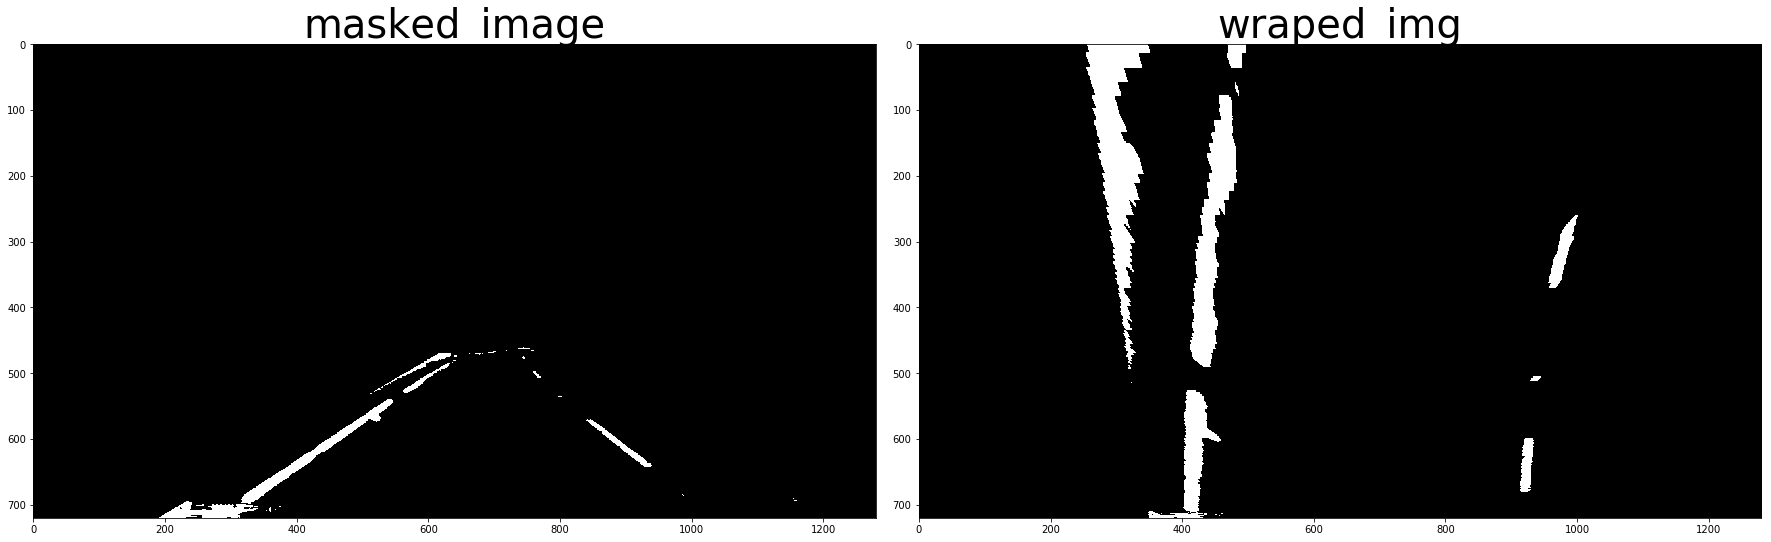

In [21]:
# image = cv2.imread('test_images/straight_lines1.jpg')

image = cv2.imread('test_images/challenge8.jpg')

M, M_back = get_transformation_matrices(image)

show_warped(image, M)

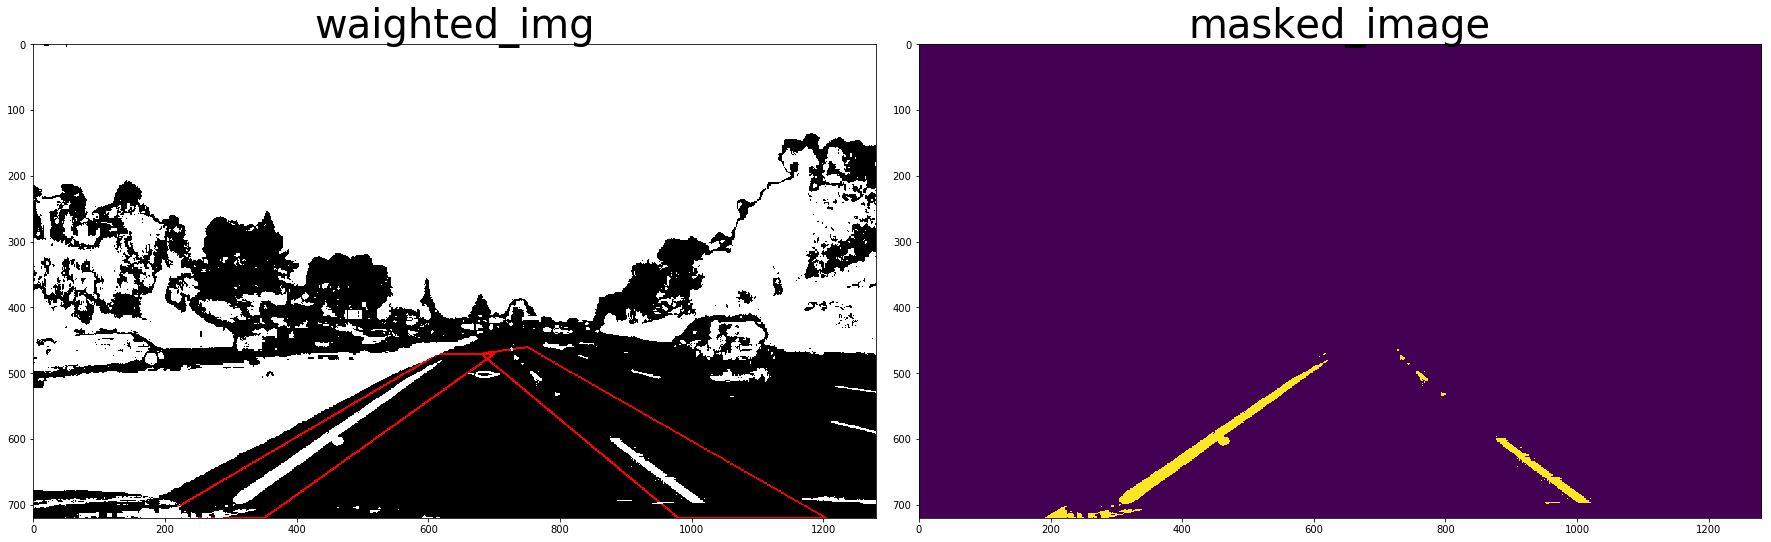

In [22]:
# image = cv2.imread('test_images/test6.jpg')

image = cv2.imread('test_images/challenge4.jpg')

# image = cv2.imread('test_images/test6.jpg')

combined_binary, s_mag_binary, r_binary, s_binary, b_binary = color_gradient_pipline(image)
    
imshape = image.shape

vertices_left = np.array([[(190,imshape[0]),(imshape[1]//2-25, imshape[0]//2+110), 
                          (imshape[1]//2+60, imshape[0]//2+110), (350,imshape[0])]], dtype=np.int32)
    
vertices_right = np.array([[(imshape[1]-300,imshape[0]),(imshape[1]//2+40, imshape[0]//2+110), 
                      (imshape[1]//2+110, imshape[0]//2+100), (imshape[1]-75,imshape[0])]], dtype=np.int32)

out_img = np.dstack((combined_binary, combined_binary, combined_binary)) * 255
line_img = np.zeros_like(out_img)

# line_img = np.zeros_like(combined_binary)
    
show_region_of_interest(line_img, vertices_left[0])
show_region_of_interest(line_img, vertices_right[0])

waighted_img = cv2.addWeighted(out_img, 1, line_img, 1, 0)

    
masked_image = region_of_interest(combined_binary)

# wraped_img = img_warp(masked_image, M)
vertices = np.array([[(190,img_size[1]),(img_size[0]//2-25, img_size[1]//2+120), 
                          (img_size[0]//2+90, img_size[1]//2+120), (img_size[0]-150,img_size[1])]], dtype=np.int32)

# out_img = np.dstack((combined_binary, combined_binary, combined_binary)) * 255
# line_img = np.zeros_like(out_img)

# # line_img = np.zeros_like(combined_binary)
    
# #show_region_of_interest(line_img, vertices_left[0])
# show_region_of_interest(line_img, vertices[0])

# waighted_img = cv2.addWeighted(out_img, 1, line_img, 1, 0)

    
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(waighted_img, cmap='gray')
ax1.set_title('waighted_img', fontsize=40)

ax2.imshow(masked_image)
ax2.set_title('masked_image', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# Finding the Lines

In [23]:
Config.M = M
Config.M_INV = M_back
Config.MTX = mtx
Config.DIST = dist
Config.IMG_SIZE = img_size
Config.PLOT_Y = np.linspace(0, Config.IMG_SIZE[1] - 1, Config.IMG_SIZE[1])
Config.Y_EVAL = np.max(Config.PLOT_Y)
Config.Y_EVAL2 = Config.PLOT_Y[img_size[1]//2]

In [24]:
# from pprint import pprint
# pprint(vars(Config))

In [25]:
lane = Lane()

log = 'log.txt'

import os
if os.path.isfile(log):
    os.remove(log)

In [26]:
def pipline(img):
    
#     print(img.shape[1], img.shape[0])
#     print(Config.IMG_SIZE)
#     print(Config.MTX)
#     print(mtx)
#     cv2.imwrite('error_frames/'+str(lane.frame_number)+'img.jpg',img)
    
    undist_image = cv2.undistort(img, Config.MTX, Config.DIST, None, Config.MTX)
    
    # undist_image = cv2.undistort(img, mtx, dist, None, mtx)
    
    combined_image = llh.color_gradient_pipline_challenge(undist_image, 
                                                          s_thresh=Config.S_THRESH_CH, r_thresh=Config.R_THRESH_CH, 
                                                          b_thresh=Config.B_THRESH_CH, s_mag_thresh=Config.S_MAG_THRESH_CH)
    
    vertices_left = np.array([[(190,imshape[0]),(imshape[1]//2-25, imshape[0]//2+110), 
                          (imshape[1]//2+60, imshape[0]//2+110), (350,imshape[0])]], dtype=np.int32)
    
    vertices_right = np.array([[(imshape[1]-300,imshape[0]),(imshape[1]//2+40, imshape[0]//2+110), 
                      (imshape[1]//2+110, imshape[0]//2+100), (imshape[1]-75,imshape[0])]], dtype=np.int32)

    masked_image = llh.region_of_interest(combined_image, [vertices_left, vertices_right])
    
    warped_image = cv2.warpPerspective(masked_image, Config.M, Config.IMG_SIZE)
    
#     plt.imshow(warped_image)
    
    if lane.num_fail >= Config.NUM_FAIL:

        leftx, lefty, rightx, righty, left_fitx, right_fitx, left_fit, right_fit = llh.fit_polynomial(warped_image)
        
        #print('left_fitx', len(left_fitx))
        #print('right_fitx', len(right_fitx))
        
        lane.left_line.update_current(leftx, lefty, left_fitx, left_fit)
        
        lane.right_line.update_current(rightx, righty, right_fitx, right_fit)
        
        lane.get_line_base_pos()
        
#         print(lane.right_line.radius_of_curvature)
#         print(lane.left_line.radius_of_curvature)
#         print(abs(lane.right_line.radius_of_curvature - lane.left_line.radius_of_curvature))
        
#         print(lane.right_line.current_xfit[-1])
#         print(lane.left_line.current_xfit[-1])
#         print(lane.right_line.current_xfit[-1] - lane.left_line.current_xfit[-1])
        
        if lane.sanity_check():
            lane.num_fail = 0

            # lane.left_line.refresh_line()
            # lane.right_line.refresh_line()

            lane.right_line.update_line_fit()
            lane.left_line.update_line_fit()
        else:
            cv2.imwrite('error_frames/'+str(lane.frame_number)+'fit_polynomial.jpg',img)
            
    else:
        #print(lane.left_line.recent_fitted)
        #print(lane.left_line.best_fit)
        
        left_fitx, leftx, lefty, line_fit = llh.search_around_poly(warped_image, lane.left_line.best_fit)
        lane.left_line.update_current(leftx, lefty, left_fitx, line_fit)
        
        right_fitx, rightx, righty, line_fit = llh.search_around_poly(warped_image, lane.right_line.best_fit)
        lane.right_line.update_current(rightx, righty, right_fitx, line_fit)
        
        lane.get_line_base_pos()
        
        if lane.sanity_check():
            lane.left_line.update_line_fit()
            lane.right_line.update_line_fit()
            lane.num_fail = 0
        else:
            cv2.imwrite('error_frames/'+str(lane.frame_number)+'search_around_poly.jpg',img)
#             cv2.imwrite('error_frames/'+str(lane.frame_number)+'undist.jpg',undist_image)
#             cv2.imwrite('error_frames/'+str(lane.frame_number)+'combined.jpg',combined_image)
#             cv2.imwrite('error_frames/'+str(lane.frame_number)+'masked.jpg',masked_image)
#             cv2.imwrite('error_frames/'+str(lane.frame_number)+'warped.jpg',warped_image)
            
            with open('log.txt', 'a+') as the_file:
                the_file.write(lane.lane_info())
    
            lane.num_fail += 1
            
    #print('recent_xfitted', len(lane.left_line.recent_xfitted))
    #print('lane.left_line.bestx', len(lane.left_line.bestx))
    #print('lane.right_line.bestx', len(lane.right_line.bestx))
    
    #print(lane.frame_number)
    
    lane.frame_number += 1        
    result_image = llh.draw_track_with_lines(undist_image, warped_image, lane.left_line.bestx, lane.right_line.bestx, Config.PLOT_Y, lane.print_frame_lane_info())
    
    return result_image

In [27]:
# import imageio
# imageio.plugins.ffmpeg.download()

# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [28]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    
    return pipline(image)

In [29]:
output_video = 'output_video/challenge_video.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer v1alues representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("challenge_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(output_video, audio=False)

[MoviePy] >>>> Building video output_video/challenge_video.mp4
[MoviePy] Writing video output_video/challenge_video.mp4


100%|██████████| 485/485 [01:08<00:00,  7.09it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_video/challenge_video.mp4 

CPU times: user 8min 6s, sys: 7.35 s, total: 8min 13s
Wall time: 1min 9s


In [30]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output_video))